Source: 
   
      Word Embeddings Versus Bag-of-Words, 
      Link: https://medium.com/swlh/word-embeddings-versus-bag-of-words-the-curious-case-of-recommender-systems-6ac1604d4424  
    
      NLP Tutorial for Text Classification in Python,
      Link: https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e 

## Step 1: Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

## For label encoding 
from sklearn.preprocessing import LabelEncoder

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to C:\Users\tadnan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tadnan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tadnan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Step 2: Loading the data set & EDA

In [3]:
df = pd.read_csv("C:\\Users\\tadnan\\OneDrive - Michigan Technological University\\Systematic Review\\Final_files_.csv")
df.head(10)

Unnamed: 0                                            Authors  \
0           0              Wagner M.; Shirgaokar M.; Marshall W.   
1           1  Zhao Q.; Winters M.; Nelson T.; Laberee K.; Fe...   
2           2  Rosenheim N.P.; Watson M.; Casellas Connors J....   
3           3  Casper A.M.A.; Atadero R.A.; Abdallah A.R.; Si...   
4           4                  Woodley L.; Rossetti P.; Nunes A.   
5           5  Long M.A.; Ritchie L.A.; Stretesky P.B.; Sible...   
6           6           Tobias-Lauerman A.; Bohon S.; Presser L.   
7           7                        Robbennolt D.; Witmer A.-P.   
8           8        Vogel K.D.; Johnson M.F.; Sveinsdóttir A.G.   
9           9  Wutich A.; Thomson P.; Jepson W.; Stoler J.; C...   

                                   Author full names  \
0  Wagner, Molly (58889990300); Shirgaokar, Manis...   
1  Zhao, Qiao (58485282700); Winters, Meghan (162...   
2  Rosenheim, Nathanael P. (57191309620); Watson,...   
3  Casper, A. M. Aramati (57217673823); Atadero, ...   
4  Woodley, Lucas (57561961700); Rossetti, Philip...   
5  Long, Michael A. (56799816200); Ritchie, Liese...   
6  Tobias-Lauerman, Abigail (58533035700); Bohon,...   
7  Robbennolt, Dale (58486740900); Witmer, Ann-Pe...   
8  Vogel, Kealie D. (58145599700); Johnson, McKen...   
9  Wutich, Amber (23981822300); Thomson, Patrick ...   

                                        Author(s) ID  \
0              58889990300; 13005901500; 16067052900   
1  58485282700; 16235208800; 58870617500; 6508354...   
2  57191309620; 57205562834; 57204886673; 5720902...   
3  57217673823; 23988525500; 57214219032; 7003959597   
4              57561961700; 57561573900; 57201554916   
5  56799816200; 15751677500; 6701440288; 58550569100   
6               58533035700; 15060002100; 6602594425   
7                            58486740900; 6602489827   
8              58145599700; 57202312464; 57221281732   
9  23981822300; 55440262200; 9248517000; 26533535...   

                                               Title  Year  \
0  Understanding Everyday Travel Experiences and ...  2024   
1  Who has access to cycling infrastructure in Ca...  2024   
2  Food Access After Disasters: A Multidimensiona...  2024   
3  Bringing Social Justice Context into Civil Eng...  2024   
4  Targeted electric vehicle procurement incentiv...  2023   
5  Perceptions of social disruption in communitie...  2024   
6  Some like it HOT: The racialization of mobilit...  2024   
7  GIS-Based Approach to Dynamic Accessibility: I...  2023   
8  Communities at Risk for Mobilization: Neoliber...  2023   
9  MAD water: Integrating modular, adaptive, and ...  2023   

                                   Source title  Volume Issue Art. No.  \
0                Transportation Research Record  2678.0     2      NaN   
1      Computers, Environment and Urban Systems   110.0   NaN   102109   
2  Journal of the American Planning Association     NaN   NaN      NaN   
3        Journal of Civil Engineering Education   150.0     2  4023013   
4                Sustainable Cities and Society    96.0   NaN   104627   
5                              Resources Policy    91.0   NaN   104965   
6        Journal of Race Ethnicity and the City     5.0     1      NaN   
7                Transportation Research Record  2677.0     7      NaN   
8                      Journal of Rural Studies    99.0   NaN      NaN   
9        Wiley Interdisciplinary Reviews: Water    10.0     6    e1680   

  Page start Page end  Page count  Cited by  \
0        454      468        14.0         1   
1        NaN      NaN         NaN         0   
2        NaN      NaN         NaN         0   
3        NaN      NaN         NaN         0   
4        NaN      NaN         NaN         4   
5        NaN      NaN         NaN         0   
6         73       94        21.0         0   
7         22       33        11.0         1   
8        134      143         9.0         3   
9        NaN      NaN         NaN         6   

    

#### Exploratory Data Analysis 

###### Column and info Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1404 non-null   int64  
 1   Authors                   1404 non-null   object 
 2   Author full names         1404 non-null   object 
 3   Author(s) ID              1404 non-null   object 
 4   Title                     1404 non-null   object 
 5   Year                      1404 non-null   int64  
 6   Source title              1404 non-null   object 
 7   Volume                    1336 non-null   float64
 8   Issue                     848 non-null    object 
 9   Art. No.                  432 non-null    object 
 10  Page start                894 non-null    object 
 11  Page end                  894 non-null    object 
 12  Page count                894 non-null    float64
 13  Cited by                  1404 non-null   int64  
 14  DOI     

In [5]:
df.columns

Index(['Unnamed: 0', 'Authors', 'Author full names', 'Author(s) ID', 'Title',
       'Year', 'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start',
       'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Abstract',
       'Author Keywords', 'PubMed ID', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID',
       'Unnamed: 25', 'Target ', 'Reasons '],
      dtype='object')

###### Remove additional spaces using stripe

In [6]:
# Ensure the 'Target ' column name is correctly specified without trailing spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Replace 'Yes ' with 'Yes' in the 'Target' column by stripping leading/trailing spaces
df['Target'] = df['Target'].str.strip()

# Display the updated DataFrame to verify the changes
df

Unnamed: 0                                            Authors  \
0              0              Wagner M.; Shirgaokar M.; Marshall W.   
1              1  Zhao Q.; Winters M.; Nelson T.; Laberee K.; Fe...   
2              2  Rosenheim N.P.; Watson M.; Casellas Connors J....   
3              3  Casper A.M.A.; Atadero R.A.; Abdallah A.R.; Si...   
4              4                  Woodley L.; Rossetti P.; Nunes A.   
5              5  Long M.A.; Ritchie L.A.; Stretesky P.B.; Sible...   
6              6           Tobias-Lauerman A.; Bohon S.; Presser L.   
7              7                        Robbennolt D.; Witmer A.-P.   
8              8        Vogel K.D.; Johnson M.F.; Sveinsdóttir A.G.   
9              9  Wutich A.; Thomson P.; Jepson W.; Stoler J.; C...   
10            10                                       Carralero P.   
11            11                 (Melrose) Pan M.; Uddin M.; Lim H.   
12            12   Schlecht C.; McGuier E.A.; Ann Huang L.; Daro D.   
13            13  Serrano N.; Schmidt L.; Eyler A.A.; Brownson R.C.   
14            14  Vallejo-Borda J.A.; Barchelot-Aceros L.J.; Bar...   
15            15  Dsouza N.; Devadason A.; Senerat A.M.; Watanat...   
16            16  Coleman N.; Esmalian A.; Lee C.-C.; Gonzales E...   
17            17         Chen P.; Wang W.; Qian C.; Cao M.; Yang T.   
18            18                                            Chen P.   
19            19                                         Arancio J.   
20            20                               Bowers A.J.; Choi Y.   
21            21                                          Datnow A.   
22            22                                     Ruan T.; Lv Q.   
23            23              Gandy C.A.; Armanios D.E.; Samaras C.   
24            24                                  Loni A.; Asadi S.   
25            25  Pickett S.T.A.; Simone A.T.; Anderson P.; Shar...   
26            26                         Stevens K.A.; Belligoni S.   
27            27     Cade R.; Yu D.; Whyte K.; Lal P.; Borgerson C.   
28            28                                           Mehra B.   
29            29                               Dunham I.; Foster A.   
30            30     Brown M.A.; Kale S.; Kyeong-Cha M.; Chapman O.   
31            31                                    Gao S.; Zhai W.   
32            32  Pan M.M.; Wong S.; Tainter F.; Woelfel S.; Rya...   
33            33                                           Barat S.   
34            34  Borowski E.; Soria J.; Schofer J.; Stathopoulo...   
35            35                                       Patwary A.L.   
36            36              Rahat R.; Calle Müller C.; ElZomor M.   
37            37                                         Teebken J.   
38            38                                          Waller J.   
39            39                            Holliman A.; Collins K.   
40            40  Ryder S.; Walker C.; Batel S.; Devine-Wright H...   
41            41   Bidadian B.; Strager M.P.; Butler P.; Ghadimi H.   
42            42                                      Hamstead Z.A.   
43            43                           Hegeman E.E.; Levin P.S.   
44            44                                  Anti S.; Zhang Z.   
45            45                            Dai T.; Li J.; Nie Y.M.   
46            46           Lee W.C.; Hall J.L.; Josiam M.; Pee C.M.   
47            47                                 Jin S.T.; Sui D.Z.   
48            48  AbdelMagid M.; AbdelRazig Y.; Smith D.; Horner...   
49            49                            Ebbin S.A.; Trumbull N.   
50            50  Nadimi N.; Camporeale R.; Khaleghi M.; Haghani...   
51            51       Wang J.; Ulibarri N.; Scott T.A.; Davis S.J.   
52            52  Kiani B.; Mamiya H.; Thierry B.; Firth C.; Ful...   
53            53                            Behrendt F.; Sheller M.   
54            54                                            Butt B.   
55            55  Furszyfer De

In [7]:
df.columns

Index(['Unnamed: 0', 'Authors', 'Author full names', 'Author(s) ID', 'Title',
       'Year', 'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start',
       'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Abstract',
       'Author Keywords', 'PubMed ID', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID',
       'Unnamed: 25', 'Target', 'Reasons'],
      dtype='object')

In [8]:
df['Reasons'].unique()

array(['Equity in Transportation',
       'Equity in Transportation outside the U.S',
       'Equity in Different Field', 'Justice in Different Field',
       'Not Directly Connected to Equity',
       'Equity in Built Environment/Infrastructure ', 'Out of Contexts',
       'Equity in Water Infrastructure', 'Out of Context',
       'Equity in Green Infrastructure',
       'Equity in Transportation Related to Electric Vehicles',
       'Equity in Transportation Related to Bridge', 'Out of Contexts ',
       'Review Paper', 'Equity in Different Field ',
       'Equity in Public Transit', 'Equity in to Bikesharing',
       'Justice in Mobility', 'Equity in Different Field outside the U.S',
       'Equity in Transportation Related to Mobility',
       'Equity in Transportation related to the access of disabled groups ',
       'Equity in Transportation related to Pavements',
       'Equity in Green Infrastructure Related to Stormwater',
       'Equity in Infrastructure Management ', 'Surve

###### Drop Unecessary Columns 

In [9]:
df.drop(['Unnamed: 0', 'Authors', 'Author full names', 'Author(s) ID','Year','Source title','Volume', 'Issue', 'Art. No.', 'Page start',
       'Page end', 'Page count', 'Cited by', 'DOI', 'Link','Author Keywords', 'PubMed ID', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID',
       'Unnamed: 25'], axis=1, inplace=True)

In [10]:
df

Title  \
0     Understanding Everyday Travel Experiences and ...   
1     Who has access to cycling infrastructure in Ca...   
2     Food Access After Disasters: A Multidimensiona...   
3     Bringing Social Justice Context into Civil Eng...   
4     Targeted electric vehicle procurement incentiv...   
5     Perceptions of social disruption in communitie...   
6     Some like it HOT: The racialization of mobilit...   
7     GIS-Based Approach to Dynamic Accessibility: I...   
8     Communities at Risk for Mobilization: Neoliber...   
9     MAD water: Integrating modular, adaptive, and ...   
10    Geontopower as a feminist analytic: an interdi...   
11    Understanding electric vehicle ownership using...   
12    Creating an interdisciplinary collaborative ne...   
13    Perspectives From Public Health Practitioners ...   
14    Addressing pedestrian perceived externalities ...   
15    Sustainability and Equity in Urban Development...   
16    Energy inequality in climate hazards: Empirica...   
17    Gravity-based models for evaluating urban park...   
18    Inequality in heat: The role of spatial patter...   
19    From inequalities to epistemic innovation: Ins...   
20    Building School Data Equity, Infrastructure, a...   
21    2022 Wallace Foundation Distinguished Lecture ...   
22    Exploring equity perception of electric vehicl...   
23                   Social Equity of Bridge Management   
24    Data-driven equitable placement for electric v...   
25    The relational shift in urban ecology: From pl...   
26    Policymaking in the dark: The impact of power ...   
27    Poor Water Quality Persists in Diverse Urban C...   
28    Toward an impact-driven framework to operation...   
29    FRINGE FINANCIAL ECOLOGIES AND PLACE-BASED EXC...   
30    Exploring the willingness of consumers to elec...   
31    Assessing adaptation planning strategies of in...   
32    Integrating equity in transportation scenario ...   
33    A micro-level perspective to fostering IDEAs i...   
34    Does ridesourcing respond to unplanned rail di...   
35    Explainable artificial intelligence for decarb...   
36    Reinforcing infrastructure equity through leve...   
37    Vulnerability locked in. On the need to engage...   
38    Stormwater Capital Improvement Planning: A Fra...   
39    California’s cap-and-trade program: is it effe...   
40    Do the ends justify the means? Problematizing ...   
41    Flood Risk Impacts from an Unlikely Source: Re...   
42    Thermal insecurity: Violence of heat and cold ...   
43    Using human health disparities and salmon heal...   
44    Roads, women's employment, and gender equity: ...   
45      Accessibility-based ethics-aware transit design   
46    (Un)equal demands and opportunities: Conceptua...   
47    Bikesharing and equity: A nationwide study of ...   
48    Transportation system performance capabilities...   
49    Contested spaces in the new blue economy: Comp...   
50    A Method to Determine an Equity Score for Tran...   
51    Environmental justice, infrastructure provisio...   
52    The temporal sequence between gentrification a...   
53                                Mobility data justice   
54    Doing environmental justice: Prospects for sus...   
55    The demographics of energy and mobility povert...   
56    Transformation and recognition: Planning just ...   
57    Drivers of Tree Canopy Loss in a Mid-Sized Gro...   
58    Shared micromobility and equity: A comparison ...   
59    How do ethics and diversity, equity, and inclu...   
60    Socially vulnerable people and stormwater infr...   
61    Neighborhood-scale air quality, public health,...   
62    Local inequities in the relative production of...   
63    Health justice and economic segregation in cli...   
64    The role of nature-based solutions and senses ...   
65    Achieving equitable outcomes through optimal d...   
66    Building equity into public park and recreatio...   
67    Integrating Social Equity into M

In [11]:
df['Target'].unique()

array(['Yes', 'No', nan], dtype=object)

###### Missing Values

In [12]:
df = df.dropna()
df 

Title  \
0    Understanding Everyday Travel Experiences and ...   
1    Who has access to cycling infrastructure in Ca...   
2    Food Access After Disasters: A Multidimensiona...   
3    Bringing Social Justice Context into Civil Eng...   
4    Targeted electric vehicle procurement incentiv...   
5    Perceptions of social disruption in communitie...   
6    Some like it HOT: The racialization of mobilit...   
7    GIS-Based Approach to Dynamic Accessibility: I...   
8    Communities at Risk for Mobilization: Neoliber...   
9    MAD water: Integrating modular, adaptive, and ...   
10   Geontopower as a feminist analytic: an interdi...   
11   Understanding electric vehicle ownership using...   
12   Creating an interdisciplinary collaborative ne...   
13   Perspectives From Public Health Practitioners ...   
14   Addressing pedestrian perceived externalities ...   
15   Sustainability and Equity in Urban Development...   
16   Energy inequality in climate hazards: Empirica...   
17   Gravity-based models for evaluating urban park...   
18   Inequality in heat: The role of spatial patter...   
19   From inequalities to epistemic innovation: Ins...   
20   Building School Data Equity, Infrastructure, a...   
21   2022 Wallace Foundation Distinguished Lecture ...   
22   Exploring equity perception of electric vehicl...   
23                  Social Equity of Bridge Management   
24   Data-driven equitable placement for electric v...   
25   The relational shift in urban ecology: From pl...   
26   Policymaking in the dark: The impact of power ...   
27   Poor Water Quality Persists in Diverse Urban C...   
28   Toward an impact-driven framework to operation...   
29   FRINGE FINANCIAL ECOLOGIES AND PLACE-BASED EXC...   
30   Exploring the willingness of consumers to elec...   
31   Assessing adaptation planning strategies of in...   
32   Integrating equity in transportation scenario ...   
33   A micro-level perspective to fostering IDEAs i...   
34   Does ridesourcing respond to unplanned rail di...   
35   Explainable artificial intelligence for decarb...   
36   Reinforcing infrastructure equity through leve...   
37   Vulnerability locked in. On the need to engage...   
38   Stormwater Capital Improvement Planning: A Fra...   
39   California’s cap-and-trade program: is it effe...   
40   Do the ends justify the means? Problematizing ...   
41   Flood Risk Impacts from an Unlikely Source: Re...   
42   Thermal insecurity: Violence of heat and cold ...   
43   Using human health disparities and salmon heal...   
44   Roads, women's employment, and gender equity: ...   
45     Accessibility-based ethics-aware transit design   
46   (Un)equal demands and opportunities: Conceptua...   
47   Bikesharing and equity: A nationwide study of ...   
48   Transportation system performance capabilities...   
49   Contested spaces in the new blue economy: Comp...   
50   A Method to Determine an Equity Score for Tran...   
51   Environmental justice, infrastructure provisio...   
52   The temporal sequence between gentrification a...   
53                               Mobility data justice   
54   Doing environmental justice: Prospects for sus...   
55   The demographics of energy and mobility povert...   
56   Transformation and recognition: Planning just ...   
57   Drivers of Tree Canopy Loss in a Mid-Sized Gro...   
58   Shared micromobility and equity: A comparison ...   
59   How do ethics and diversity, equity, and inclu...   
60   Socially vulnerable people and stormwater infr...   
61   Neighborhood-scale air quality, public health,...   
62   Local inequities in the relative production of...   
63   Health justice and economic segregation in cli...   
64   The role of nature-based solutions and senses ...   
65   Achieving equitable outcomes through optimal d...   
66   Building equity into public park and recreatio...   
67   Integrating Social Equity into Multiobjective ...   
68   Shifted out: The well-being and justice im

#### Label encoding the Traget 

In [13]:
# Apply label encoding to the 'Target' column
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

df

C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\27102610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = label_encoder.fit_transform(df['Target'])


Title  \
0    Understanding Everyday Travel Experiences and ...   
1    Who has access to cycling infrastructure in Ca...   
2    Food Access After Disasters: A Multidimensiona...   
3    Bringing Social Justice Context into Civil Eng...   
4    Targeted electric vehicle procurement incentiv...   
5    Perceptions of social disruption in communitie...   
6    Some like it HOT: The racialization of mobilit...   
7    GIS-Based Approach to Dynamic Accessibility: I...   
8    Communities at Risk for Mobilization: Neoliber...   
9    MAD water: Integrating modular, adaptive, and ...   
10   Geontopower as a feminist analytic: an interdi...   
11   Understanding electric vehicle ownership using...   
12   Creating an interdisciplinary collaborative ne...   
13   Perspectives From Public Health Practitioners ...   
14   Addressing pedestrian perceived externalities ...   
15   Sustainability and Equity in Urban Development...   
16   Energy inequality in climate hazards: Empirica...   
17   Gravity-based models for evaluating urban park...   
18   Inequality in heat: The role of spatial patter...   
19   From inequalities to epistemic innovation: Ins...   
20   Building School Data Equity, Infrastructure, a...   
21   2022 Wallace Foundation Distinguished Lecture ...   
22   Exploring equity perception of electric vehicl...   
23                  Social Equity of Bridge Management   
24   Data-driven equitable placement for electric v...   
25   The relational shift in urban ecology: From pl...   
26   Policymaking in the dark: The impact of power ...   
27   Poor Water Quality Persists in Diverse Urban C...   
28   Toward an impact-driven framework to operation...   
29   FRINGE FINANCIAL ECOLOGIES AND PLACE-BASED EXC...   
30   Exploring the willingness of consumers to elec...   
31   Assessing adaptation planning strategies of in...   
32   Integrating equity in transportation scenario ...   
33   A micro-level perspective to fostering IDEAs i...   
34   Does ridesourcing respond to unplanned rail di...   
35   Explainable artificial intelligence for decarb...   
36   Reinforcing infrastructure equity through leve...   
37   Vulnerability locked in. On the need to engage...   
38   Stormwater Capital Improvement Planning: A Fra...   
39   California’s cap-and-trade program: is it effe...   
40   Do the ends justify the means? Problematizing ...   
41   Flood Risk Impacts from an Unlikely Source: Re...   
42   Thermal insecurity: Violence of heat and cold ...   
43   Using human health disparities and salmon heal...   
44   Roads, women's employment, and gender equity: ...   
45     Accessibility-based ethics-aware transit design   
46   (Un)equal demands and opportunities: Conceptua...   
47   Bikesharing and equity: A nationwide study of ...   
48   Transportation system performance capabilities...   
49   Contested spaces in the new blue economy: Comp...   
50   A Method to Determine an Equity Score for Tran...   
51   Environmental justice, infrastructure provisio...   
52   The temporal sequence between gentrification a...   
53                               Mobility data justice   
54   Doing environmental justice: Prospects for sus...   
55   The demographics of energy and mobility povert...   
56   Transformation and recognition: Planning just ...   
57   Drivers of Tree Canopy Loss in a Mid-Sized Gro...   
58   Shared micromobility and equity: A comparison ...   
59   How do ethics and diversity, equity, and inclu...   
60   Socially vulnerable people and stormwater infr...   
61   Neighborhood-scale air quality, public health,...   
62   Local inequities in the relative production of...   
63   Health justice and economic segregation in cli...   
64   The role of nature-based solutions and senses ...   
65   Achieving equitable outcomes through optimal d...   
66   Building equity into public park and recreatio...   
67   Integrating Social Equity into Multiobjective ...   
68   Shifted out: The well-being and justice im

#### Class Distribution 

Target
0    531
1    315
Name: count, dtype: int64


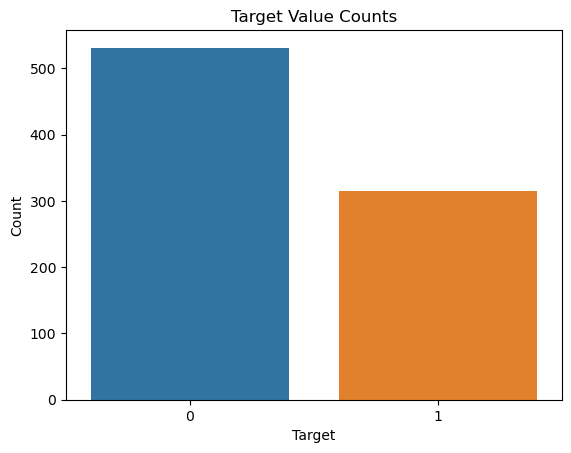

In [14]:
x=df['Target'].value_counts()
print(x)

# Calculate value counts
value_counts = df['Target'].value_counts()

# Create a bar plot
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Value Counts')
plt.show()

###### Word Count  

In [15]:
df['word_count'] = df['Abstract'].apply(lambda x: len(str(x).split()))
print(df[df['Target']==1]['word_count'].mean()) # Yes : Related Article 
print(df[df['Target']==0]['word_count'].mean()) # No : Not Related Article 

208.93650793650792
200.20527306967986


C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\2459185373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['Abstract'].apply(lambda x: len(str(x).split()))


######  Plott Word Count

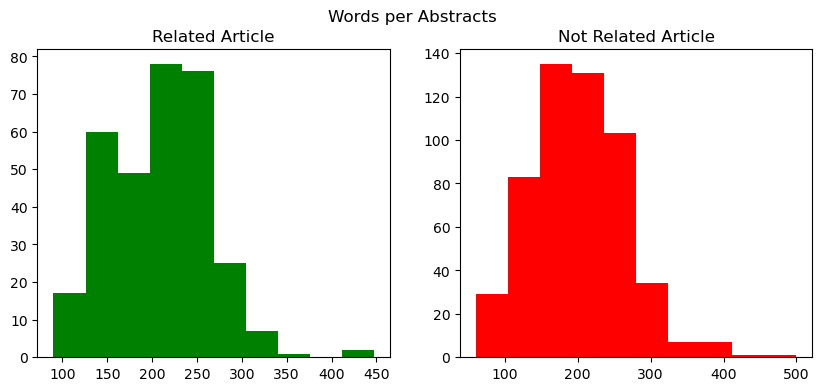

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df[df['Target']==1]['word_count']
ax1.hist(train_words,color='green')
ax1.set_title('Related Article')
train_words=df[df['Target']==0]['word_count']
ax2.hist(train_words,color='red')
ax2.set_title('Not Related Article')
fig.suptitle('Words per Abstracts')
plt.show()

#### CHARACTER-COUNT

In [17]:
df['char_count'] = df['Abstract'].apply(lambda x: len(str(x)))
print(df[df['Target']==1]['char_count'].mean())  # Yes : Related Article 
print(df[df['Target']==0]['char_count'].mean()) # No : Not Related Article 

1483.7047619047619
1414.3860640301318


C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\997251973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count'] = df['Abstract'].apply(lambda x: len(str(x)))


## Step 3: Text Preprocessing 

In [18]:
import re
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [19]:
# Create a local directory for NLTK data
import os
nltk_data_path = os.path.expanduser('~/nltk_data')
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

In [20]:
# Download the necessary NLTK resources to the local directory
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('averaged_perceptron_tagger', download_dir=nltk_data_path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tadnan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\tadnan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tadnan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tadnan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
# Set NLTK data path to the local directory
nltk.data.path.append(nltk_data_path)

#### Convert to lowercase, strip and remove punctuations


In [22]:
# Define your preprocessing functions
def preprocess(text):
    text = text.lower()
    text = text.strip()
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

#### STOPWORD REMOVAL

In [23]:
def stopword(string):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in string.split() if word not in stop_words])


#### LEMMATIZATION

In [24]:
# Initialize the lemmatizer
wl = WordNetLemmatizer()

In [25]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [26]:
# Tokenize the sentence and lemmatize
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string))  # Get position tags
    a = [wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]  # Map the position tag and lemmatize the word/token
    return " ".join(a)


#### Final pre-processing

In [27]:
def finalpreprocess(string):
    if isinstance(string, str) and string.strip():  # Check if the input is a non-empty string
        return lemmatizer(stopword(preprocess(string)))
    else:
        return ""  # Return an empty string if the input is not valid

def apply_preprocessing(row):
    try:
        return finalpreprocess(row)
    except Exception as e:
        print(f"Error processing row: {row}")
        print(f"Exception: {e}")
        return ""

In [28]:
# Apply the preprocessing function to the 'Abstract' column
df['clean_text_Abstract'] = df['Abstract'].apply(lambda x: apply_preprocessing(x))

# Apply the preprocessing function to the 'Title' column
df['clean_text_Title'] = df['Title'].apply(lambda x: apply_preprocessing(x))

C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\1734379273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_Abstract'] = df['Abstract'].apply(lambda x: apply_preprocessing(x))
C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\1734379273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_Title'] = df['Title'].apply(lambda x: apply_preprocessing(x))


In [29]:
df

Title  \
0    Understanding Everyday Travel Experiences and ...   
1    Who has access to cycling infrastructure in Ca...   
2    Food Access After Disasters: A Multidimensiona...   
3    Bringing Social Justice Context into Civil Eng...   
4    Targeted electric vehicle procurement incentiv...   
5    Perceptions of social disruption in communitie...   
6    Some like it HOT: The racialization of mobilit...   
7    GIS-Based Approach to Dynamic Accessibility: I...   
8    Communities at Risk for Mobilization: Neoliber...   
9    MAD water: Integrating modular, adaptive, and ...   
10   Geontopower as a feminist analytic: an interdi...   
11   Understanding electric vehicle ownership using...   
12   Creating an interdisciplinary collaborative ne...   
13   Perspectives From Public Health Practitioners ...   
14   Addressing pedestrian perceived externalities ...   
15   Sustainability and Equity in Urban Development...   
16   Energy inequality in climate hazards: Empirica...   
17   Gravity-based models for evaluating urban park...   
18   Inequality in heat: The role of spatial patter...   
19   From inequalities to epistemic innovation: Ins...   
20   Building School Data Equity, Infrastructure, a...   
21   2022 Wallace Foundation Distinguished Lecture ...   
22   Exploring equity perception of electric vehicl...   
23                  Social Equity of Bridge Management   
24   Data-driven equitable placement for electric v...   
25   The relational shift in urban ecology: From pl...   
26   Policymaking in the dark: The impact of power ...   
27   Poor Water Quality Persists in Diverse Urban C...   
28   Toward an impact-driven framework to operation...   
29   FRINGE FINANCIAL ECOLOGIES AND PLACE-BASED EXC...   
30   Exploring the willingness of consumers to elec...   
31   Assessing adaptation planning strategies of in...   
32   Integrating equity in transportation scenario ...   
33   A micro-level perspective to fostering IDEAs i...   
34   Does ridesourcing respond to unplanned rail di...   
35   Explainable artificial intelligence for decarb...   
36   Reinforcing infrastructure equity through leve...   
37   Vulnerability locked in. On the need to engage...   
38   Stormwater Capital Improvement Planning: A Fra...   
39   California’s cap-and-trade program: is it effe...   
40   Do the ends justify the means? Problematizing ...   
41   Flood Risk Impacts from an Unlikely Source: Re...   
42   Thermal insecurity: Violence of heat and cold ...   
43   Using human health disparities and salmon heal...   
44   Roads, women's employment, and gender equity: ...   
45     Accessibility-based ethics-aware transit design   
46   (Un)equal demands and opportunities: Conceptua...   
47   Bikesharing and equity: A nationwide study of ...   
48   Transportation system performance capabilities...   
49   Contested spaces in the new blue economy: Comp...   
50   A Method to Determine an Equity Score for Tran...   
51   Environmental justice, infrastructure provisio...   
52   The temporal sequence between gentrification a...   
53                               Mobility data justice   
54   Doing environmental justice: Prospects for sus...   
55   The demographics of energy and mobility povert...   
56   Transformation and recognition: Planning just ...   
57   Drivers of Tree Canopy Loss in a Mid-Sized Gro...   
58   Shared micromobility and equity: A comparison ...   
59   How do ethics and diversity, equity, and inclu...   
60   Socially vulnerable people and stormwater infr...   
61   Neighborhood-scale air quality, public health,...   
62   Local inequities in the relative production of...   
63   Health justice and economic segregation in cli...   
64   The role of nature-based solutions and senses ...   
65   Achieving equitable outcomes through optimal d...   
66   Building equity into public park and recreatio...   
67   Integrating Social Equity into Multiobjective ...   
68   Shifted out: The well-being and justice im

## Step 4: Extracting vectors from text (Vectorization)

It’s difficult to work with text data while building Machine learning models since these models need well-defined numerical data. The process to convert text data into numerical data/vector, is called vectorization or in the NLP world, word embedding. Bag-of-Words(BoW) and Word Embedding (with Word2Vec) are two well-known methods for converting text data to numerical data.

There are a few versions of Bag of Words, corresponding to different words scoring methods. We use the Sklearn library to calculate the BoW numerical values using these approaches:

Count vectors: It builds a vocabulary from a corpus of documents and counts how many times the words appear in each document

Term Frequency-Inverse Document Frequencies (tf-Idf): Count vectors might not be the best representation for converting text data to numerical data. So, instead of simple counting, we can also use an advanced variant of the Bag-of-Words that uses the term frequency–inverse document frequency (or Tf-Idf). Basically, the value of a word increases proportionally to count in the document, but it is inversely proportional to the frequency of the word in the corpus

Word2Vec: One of the major drawbacks of using Bag-of-words techniques is that it can’t capture the meaning or relation of the words from vectors. Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network which is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

WE applied Word2Vec here

In [30]:
# Combine the cleaned text from all columns into a single column
df['clean_text_combined'] = df['clean_text_Abstract'] + ' ' + df['clean_text_Title']

# Tokenize the cleaned combined text
df['clean_text_tok'] = df['clean_text_combined'].apply(lambda x: word_tokenize(x))


C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\3885034493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_combined'] = df['clean_text_Abstract'] + ' ' + df['clean_text_Title']
C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\3885034493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_tok'] = df['clean_text_combined'].apply(lambda x: word_tokenize(x))


In [31]:
# Train a Word2Vec model
sentences = df['clean_text_tok'].tolist()
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [32]:
# Define the MeanEmbeddingVectorizer class
class MeanEmbeddingVectorizer:
    def __init__(self, model):
        self.model = model
        self.vector_size = model.vector_size
        
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        return np.array([
            np.mean([self.model.wv[word] for word in words if word in self.model.wv] or [np.zeros(self.vector_size)], axis=0)
            for words in X
        ])

In [33]:
# Create a dictionary from the Word2Vec model
w2v = dict(zip(w2v_model.wv.index_to_key, w2v_model.wv.vectors))

# Initialize MeanEmbeddingVectorizer with the Word2Vec model
modelw = MeanEmbeddingVectorizer(w2v_model)

# Transform the clean_text_tok into vectors using MeanEmbeddingVectorizer
X_vectors = modelw.transform(sentences)


In [34]:
# Separate features and target variable
Y = df['Target']

#### Train Test Split 

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_vectors, Y, test_size=0.3, random_state=42)

## Step 5. Apply ML algorithms

In [36]:
# Train Logistic Regression model
lr_w2v = LogisticRegression(solver='liblinear', C=10, penalty='l2')
lr_w2v.fit(X_train, Y_train)

# Predict y value for test dataset
y_predict = lr_w2v.predict(X_test)
y_prob = lr_w2v.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression model
print("Logistic Regression Model (W2v)")
print("Classification Report:\n", classification_report(Y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_predict))

Logistic Regression Model (W2v)
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       159
           1       0.78      0.41      0.54        95

    accuracy                           0.74       254
   macro avg       0.75      0.67      0.68       254
weighted avg       0.75      0.74      0.71       254

Confusion Matrix:
 [[148  11]
 [ 56  39]]


In [37]:
# Train Naive Bayes model
nb = MultinomialNB()
# Note: MultinomialNB expects non-negative feature vectors, so we ensure that vectors are non-negative
X_train_nb = np.abs(X_train)
X_test_nb = np.abs(X_test)
nb.fit(X_train_nb, Y_train)
y_pred_nb = nb.predict(X_test_nb)

# Evaluate Naive Bayes model
print("\nNaive Bayes Model")
print("Classification Report:\n", classification_report(Y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_nb))


Naive Bayes Model
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       159
           1       0.00      0.00      0.00        95

    accuracy                           0.63       254
   macro avg       0.31      0.50      0.38       254
weighted avg       0.39      0.63      0.48       254

Confusion Matrix:
 [[159   0]
 [ 95   0]]


C:\Users\tadnan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tadnan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tadnan\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Test Your Model 

In [38]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [39]:
# Load your new dataset
df_test = pd.read_csv("C:\\Users\\tadnan\\Scopus\\Final_files_ - Copy.csv")

In [40]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Assuming apply_preprocessing is already defined and imported

# Apply the preprocessing function to the 'Abstract' column
df['clean_text_Abstract'] = df['Abstract'].apply(lambda x: apply_preprocessing(x))

# Apply the preprocessing function to the 'Title' column
df['clean_text_Title'] = df['Title'].apply(lambda x: apply_preprocessing(x))

# Combine the cleaned text from all columns into a single column
df['clean_text_combined'] = df['clean_text_Abstract'] + ' ' + df['clean_text_Title']

# Tokenize the cleaned combined text
df['clean_text_tok'] = df['clean_text_combined'].apply(lambda x: word_tokenize(x))

# Assuming df_test is already defined and has the same structure as df
# Apply the preprocessing function to the 'Abstract' column in df_test
df_test['clean_text_Abstract'] = df_test['Abstract'].apply(lambda x: apply_preprocessing(x))

# Apply the preprocessing function to the 'Title' column in df_test
df_test['clean_text_Title'] = df_test['Title'].apply(lambda x: apply_preprocessing(x))

# Combine the cleaned text from all columns into a single column in df_test
df_test['clean_text_combined'] = df_test['clean_text_Abstract'] + ' ' + df_test['clean_text_Title']

# Tokenize the cleaned combined text in df_test
df_test['clean_text_tok'] = df_test['clean_text_combined'].apply(lambda x: word_tokenize(x))

# Transform the clean_text_tok into vectors using MeanEmbeddingVectorizer
X_test_new = modelw.transform(df_test['clean_text_tok'].tolist())

# Use the trained Logistic Regression model to predict 'target' values for the new dataset
y_predict_new = lr_w2v.predict(X_test_new)
y_prob_new = lr_w2v.predict_proba(X_test_new)[:, 1]

# Add the prediction probabilities and target predictions to the new dataset
df_test['predict_prob'] = y_prob_new
df_test['target'] = y_predict_new

# Prepare the final DataFrame
final = df_test[['clean_text_combined', 'target']].reset_index(drop=True)
final.head(400)


C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\1153142704.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_Abstract'] = df['Abstract'].apply(lambda x: apply_preprocessing(x))
C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\1153142704.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text_Title'] = df['Title'].apply(lambda x: apply_preprocessing(x))
C:\Users\tadnan\AppData\Local\Temp\ipykernel_3592\1153142704.py:14: SettingWithCopyWarning: 
A value is trying to be set on a

clean_text_combined  target
0    common perception transportation experience pe...       0
1    canadian city make significant investment cycl...       1
2    problem research strategy finding access disas...       0
3    civil engineering education must update keep p...       0
4    electric vehicle evs one solution create trans...       0
5    study test conceptual model perception communi...       0
6    transportation united state deeply intricately...       0
7    accessibility common system performance measur...       1
8    abundant literature develop examine condition ...       0
9    centralized water infrastructure last century ...       0
10   article theorise presence contemporary indian ...       0
11   global shift toward electric vehicle evs clima...       1
12   background child maltreatment complex problem ...       0
13   purpose evidence suggest differential impact c...       0
14   pedestrian externality usually generate motor ...       0
15   sustainable equitable urban development eud vi...       0
16   due effect climate change urbanization severit...       0
17   gravity base model extensively utilized urban ...       1
18   focus inequity heat distribution influence spa...       0
19   literature environmental science document unde...       0
20   despite increase call build equitable data inf...       0
21   draw set study conduct decade article provide ...       0
22   electric vehicle evs consider promising soluti...       0
23   data drive social equity assessment infrastruc...       0
24   california electric vehicle ev regulation phas...       0
25   perspective emerge ongoing dialogue among ecol...       0
26   access real time historical power outage data ...       0
27   human need water survive water also efficientl...       0
28   information researcher social justice social e...       0
29   access safe affordable financial service essen...       0
30   paper explore willingness consumer pay three k...       0
31   study assess commonly adopt adaptation plannin...       0
32   address grow uncertainties future transportati...       0
33   inclusion diversity equity access idea spur cr...       0
34   urban rail transit network provide critical ac...       0
35   article explore adoption alternative fuel vehi...       0
36   purpose construction education rarely address ...       0
37   vulnerable population experience emphasis clim...       0
38   frequent disruptive non disaster declare pluvi...       0
39   purpose company affect californias cap trade l...       0
40   propose energy project across rural working la...       0
41   recent decade urban area face increase flood r...       0
42   often describe silent killer invisible threat ...       0
43   stormwater pollution pervasive urban environme...       0
44   much recent research focus local economic effe...       1
45   study propose new strategic transit design met...       0
46   background well know earn bachelor degree engi...       0
47   bikesharing gain global popularity sustainable...       1
48   critical component transportation system resil...       1
49   work waterfront space limit lead competition c...       0
50   transportation equity vital fulfillment citize...       1
51   environmental impact assessment eia decision s...       0
52   increase cycle infrastructure might link gentr...       0
53   mobility experience become intrinsically link ...       0
54   response national attention question racial ju...       0
55   energy mobility poverty limit people choice op...       0
56   climate change alter context human mobility du...       0
57   benefit urban tree tree canopy utc increasingl...       0
58   study compare equality equity four share micro...       1
59   background paper begin premise ethic diversity...       0
60   green infrastructure gi gain recognition notab...       0
61   electric vehicle evs constitute fraction curre...       0
62   vehicular air pollution create ongoing air qua...       0
63 